In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
import warnings
from matplotlib import pyplot as plt
import numpy as np
u= mda.Universe("vars/output_no_water.gro", "vars/output_no_water.xtc")
NUM_RES = 59
NUM_PROTEINS = 50
PROTEIN_LEN = 129
RNA_LEN = 159 # indicates the rna length
NUM_RNA = 50
NUM_RES_RNA = 24 #how many RESIDUES (nucleotide bases) in one rna
RNA_START_INDEX = NUM_PROTEINS * PROTEIN_LEN

all_prot = u.select_atoms(f"bynum 1:{NUM_PROTEINS* PROTEIN_LEN}")
all_rna = u.select_atoms(f"bynum {RNA_START_INDEX+1}:{RNA_START_INDEX + RNA_LEN*NUM_RNA}")
all_mol = u.select_atoms(f"bynum 1:{RNA_START_INDEX + RNA_LEN*NUM_RNA}")

prot1 = u.select_atoms(f"bynum 1:{PROTEIN_LEN}")
prot2 = u.select_atoms(f"bynum {PROTEIN_LEN+1}:{2*PROTEIN_LEN}")
print(len(prot1))
prot2_50 = u.select_atoms(f"bynum {PROTEIN_LEN+1}:{NUM_PROTEINS * PROTEIN_LEN}")

rna1 = u.select_atoms(f"bynum {RNA_START_INDEX+1}:{RNA_START_INDEX + RNA_LEN}")
rna2_all_others = u.select_atoms(f"bynum {RNA_START_INDEX +RNA_LEN + 1}:{RNA_START_INDEX+NUM_PROTEINS * PROTEIN_LEN}")
prot2_50_rna = u.select_atoms(f"bynum {PROTEIN_LEN+1}:{RNA_START_INDEX + RNA_LEN*NUM_RNA}")

print(len(prot2_50))
args = [[all_prot, all_prot]]

# rdf = InterRDF(prot1, all_prot)
# # can skip frames
# rdf.run(start=1, stop=2)

# plt.plot(rdf.bins, rdf.rdf)
# print(len(rdf.rdf))

/opt/conda/envs/gromacs/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


129
6321


/opt/conda/envs/gromacs/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:339: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/opt/conda/envs/gromacs/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:347: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)
/tmp/ipykernel_3099125/1619118297.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


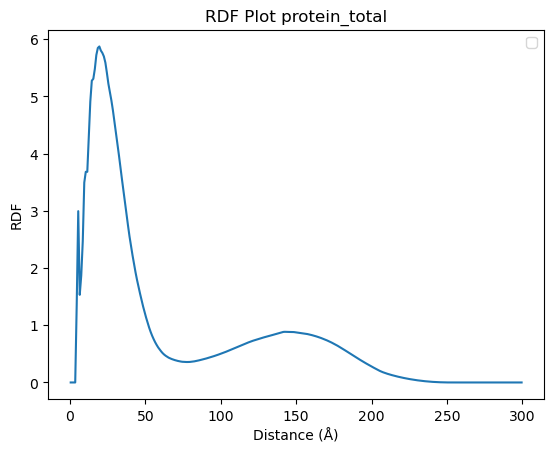

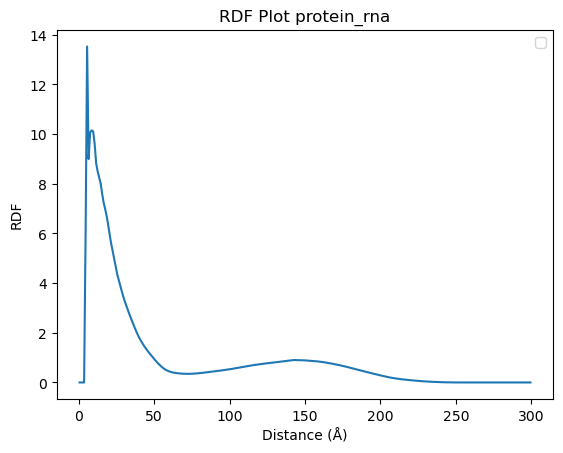

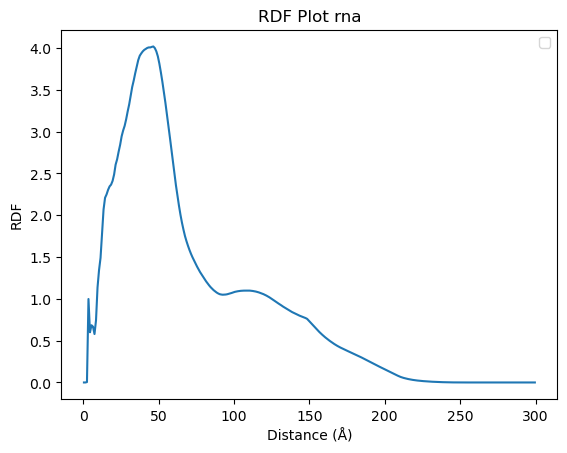

In [3]:
from MDAnalysis.analysis.rdf import InterRDF
import matplotlib.pyplot as plt
import os
import csv

def run_rdf_analysis(group1, group2, box_size=300, name=""):
    rdf = InterRDF(group1, group2, range=(0,box_size), nbins=int(box_size))
    rdf.run()
    results = rdf
    plt.plot(rdf.bins, rdf.rdf)
    plt.xlabel("Distance (Å)")
    plt.ylabel("RDF")
    plt.legend()
    plt.title(f"RDF Plot {name}")
    plt.show()
    return results
# Define AtomGroups for the RDF calculation
def save_rdf(results, output_file):
    output_path = "results/rdf/"
    if not os.path.isdir(output_path):
        os.makedirs(output_path, exist_ok=True)
    with open(output_path+output_file, "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        header = ["Distance (Å)", "RDF"]
        writer.writerow(header)
        for row in zip(results.bins, results.rdf):
            writer.writerow(row)
    
            
output_file = "rdf_protein_total.csv"
ag1 = prot1
ag2 = prot2_50

res = run_rdf_analysis(ag1, ag2, box_size=300, name="protein_total")
save_rdf(res,  "rdf_protein_total.csv")
res2 = run_rdf_analysis(prot1, prot2_50_rna, box_size=300, name="protein_rna")
save_rdf(res2,  "rdf_protein_rna.csv")
res3 = run_rdf_analysis(rna1, rna2_all_others, box_size=300, name="rna")
save_rdf(res2,  "rdf_rna.csv")
# rdf_prot = InterRDF(ag1, ag2, range=(0, 300), nbins = 300)
# rdf_prot.run()

# # Store the RDF result for this window
# results = rdf_prot.rdf

# plt.plot(rdf_prot.bins, rdf_prot.rdf)

# plt.xlabel("Distance (Å)")
# plt.ylabel("RDF")
# plt.legend()
# plt.title("RDF Changes Over Time")
# plt.show()


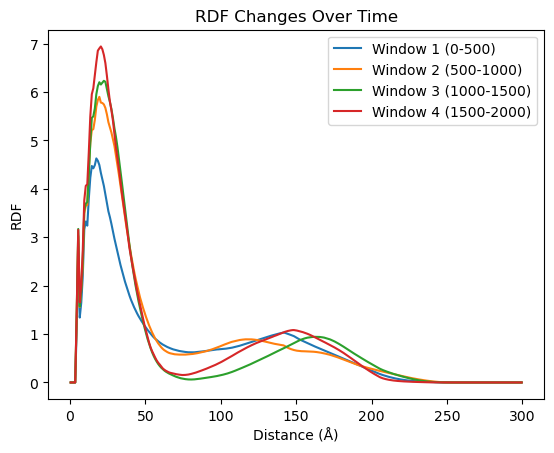

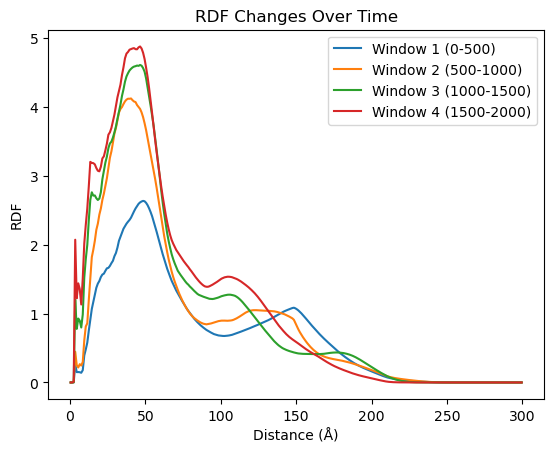

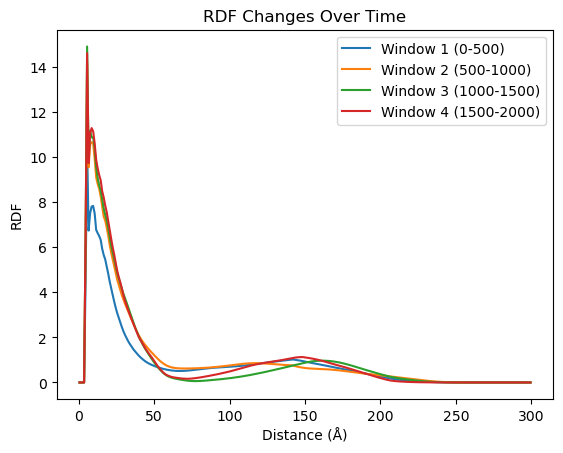

[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.58944584e+00, 1.04157125e+01, 6.73290955e+00, 7.51054529e+00,
        7.80057221e+00, 7.82550297e+00, 7.49719630e+00, 6.76487431e+00,
        6.61962444e+00, 6.49334692e+00, 6.32494277e+00, 5.92746021e+00,
        5.65148199e+00, 5.45637771e+00, 5.13411001e+00, 4.82087862e+00,
        4.46398013e+00, 4.15995748e+00, 3.87511721e+00, 3.57336302e+00,
        3.30689881e+00, 3.06434375e+00, 2.86090864e+00, 2.65572510e+00,
        2.46298899e+00, 2.28259228e+00, 2.12509899e+00, 1.98590649e+00,
        1.85700763e+00, 1.74020559e+00, 1.63630477e+00, 1.53948454e+00,
        1.44350574e+00, 1.36319293e+00, 1.28136459e+00, 1.20676371e+00,
        1.13785344e+00, 1.07604974e+00, 1.01890421e+00, 9.65794975e-01,
        9.17499757e-01, 8.75735835e-01, 8.38823052e-01, 8.04701974e-01,
        7.74063945e-01, 7.46206801e-01, 7.20661947e-01, 6.94631960e-01,
        6.73276217e-01, 6.51557290e-01, 6.30572225e-01, 6.102840

In [4]:
from MDAnalysis.analysis.rdf import InterRDF
import matplotlib.pyplot as plt
import os
import csv

# Define AtomGroups for the RDF calculation
ag1 = prot1
ag2 = prot2_50

# Parameters
num_frames = len(u.trajectory)
num_windows = 4


# Ensure the results rdf folder exists
output_path = "results/rdf/"
if not os.path.isdir(output_path):
    os.makedirs(output_path, exist_ok=True)

def rdf_evol(group1, group2, num_frames, num_windows=4, output_csv="rdf_results.csv"):
    rdf_results = []
    frames_per_window = int(num_frames / num_windows)
    bins = None  # To store the bins once (common for all windows)
    
    for i in range(num_windows):
        start_frame = i * frames_per_window
        stop_frame = start_frame + frames_per_window
        rdf = InterRDF(group1, group2, range=(0, 300), nbins=300)
        rdf.run(start=start_frame, stop=stop_frame)
        
        # Save bins only once
        if bins is None:
            bins = rdf.results.bins
        
        # Append RDF values
        rdf_results.append(rdf.results.rdf)
        
        # Plot the RDF for the window
        plt.plot(rdf.results.bins, rdf.results.rdf, label=f"Window {i+1} ({start_frame}-{stop_frame})")
    
    plt.xlabel("Distance (Å)")
    plt.ylabel("RDF")
    plt.legend()
    plt.title("RDF Changes Over Time")
    plt.show()
    
    # Write RDF results to CSV
    with open(output_csv, "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        
        # Write header
        header = ["Distance (Å)"] + [f"Window {i+1}" for i in range(num_windows)]
        writer.writerow(header)
        
        # Write rows
        for row in zip(bins, *rdf_results):
            writer.writerow(row)
    
    return rdf_results


output_csv = "windowed_rdf_proteins.csv"
full_path = output_path + output_csv
rdf_evol(ag1, ag2, num_frames, num_windows=4, output_csv=full_path)
output_csv = "windowed_rdf_rna.csv"
full_path = output_path + output_csv
rdf_evol(rna1, rna2_all_others, num_frames, num_windows=4, output_csv=full_path)
output_csv = "windowed_rdf_all.csv"
full_path = output_path + output_csv
rdf_evol(prot1, prot2_50_rna, num_frames, num_windows=4, output_csv=full_path)
